# Проект: Статистический анализ данных

Проект по статистическому анализу данных на примере сервиса аренды самокатов. Нам были переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Сервисом можно пользоваться:


* без подписки
  * абонентская плата отсутствует;
  * стоимость одной минуты поездки — 8 рублей;
  * стоимость старта (начала поездки) — 50 рублей;
* подпиской Ultra
  * абонентская плата — 199 рублей в месяц;
  * стоимость одной минуты поездки — 6 рублей;
  * стоимость старта — бесплатно.

**Цель исследования**

Проанализировать предоставленные данные и проверить следующие гипотезы, которые могут потенциально повлиять на прибыль компании:
1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?  

Если в ходе проверки гипотез подтвердится, что пользователи с подпиской ultra потенциально выгоднее для компании и приносят больше выручки, чем пользователи без подписки, то продакт-менеджеры сервиса будут увеличивать количество пользователей с подпиской, запуская различные акции.

**Ход исследования**

Исследование пройдет в несколько этапов:

1. ***Загрузка и обзор данных***: верхнеуровнево рассмотрим и проанализируем датасеты и общую информацию о них.
2. ***Предобработка данных***: данные предоставлены в "сыром" виде, нужно привести их к нормальному виду, по максимуму избавиться от пропущенных значений, чтобы облегчить рабобту с данными и избежать ошибочных резуальтатов исследования.
3. ***Исследовательский анализ данных***: построим визуализации общей информации о пользователях и их поездках и опишем их.
4. ***Объединение всех данных в единый датафрейм***
5. ***Подсчет выручки*** путем создания нового датафрема и добавления дополнительных колонок.
6. ***Проверка гипотез*** с использованием ttest-ов.

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import statistics

## Загрузка и обзор данных

### Обзор данных о пользователях

In [2]:
#считываем данные из файла users_go.csv, где хранится информация о пользователях
#сохраняем датафрейм в переменную users
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
#создаем функцию вывода первых 20 строк датафрейма, общей информации о датафрейме и гистограм
def show_data(df):
    print(df.head(20))
    print()
    print(df.info())
    print()
    df.hist()
    print(plt.show())

    user_id        name  age            city subscription_type
0         1        Кира   22          Тюмень             ultra
1         2   Станислав   31            Омск             ultra
2         3     Алексей   20          Москва             ultra
3         4  Константин   26  Ростов-на-Дону             ultra
4         5       Адель   28            Омск             ultra
5         6      Регина   25       Краснодар             ultra
6         7       Игорь   23            Омск             ultra
7         8        Юрий   23       Краснодар             ultra
8         9          Ян   21       Пятигорск             ultra
9        10     Валерий   18    Екатеринбург             ultra
10       11       Агата   31       Краснодар             ultra
11       12        Марк   27          Тюмень             ultra
12       13         Ева   24       Краснодар             ultra
13       14    Антонина   18       Пятигорск             ultra
14       15     Валерия   24          Тюмень           

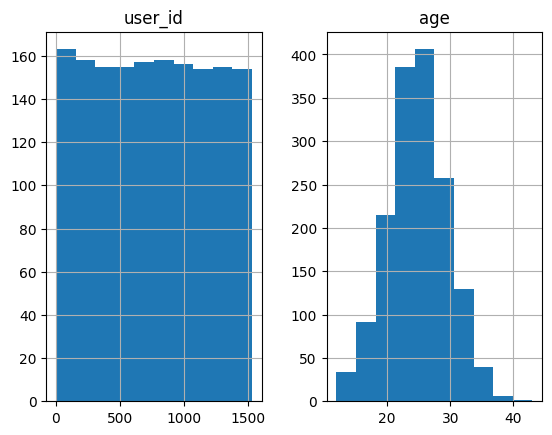

None


In [4]:
#выводим информацию о датафрейме users
show_data(users)

В датафрейме с информацией о пользователях 5 колонок. Из документации мы узнали, какая информация хранится в каждой из колонок:  
`user_id` - уникальный идентификатор пользователя  
`name` - имя пользователя  
`age` - возраст  
`city` - город  
`subscription_type` - тип подписки (free, ultra)  

Две колонки содержат *целочисленный* тип данных *int64* и три колонки - *строковый object*.  

Максимальное количество строк в таблице users - 1565. В каждом столбце то же количество строк, что означает отсутствие пропусков в данных.

Вес датасета составляет около 61.3 Кб.


### Обзор данных о поездках пользователей

In [5]:
#считываем данные из файла rides_go.csv, где хранится информация о поездках пользователей
#сохраняем датафрейм в переменную rides
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

    user_id     distance   duration        date
0         1  4409.919140  25.599769  2021-01-01
1         1  2617.592153  15.816871  2021-01-18
2         1   754.159807   6.232113  2021-04-20
3         1  2694.783254  18.511000  2021-08-11
4         1  4028.687306  26.265803  2021-08-28
5         1  2770.890808  16.650138  2021-10-09
6         1  3039.020292  14.927879  2021-10-19
7         1  2842.118050  23.117468  2021-11-06
8         1  3412.690668  15.238072  2021-11-14
9         1   748.690645  15.041884  2021-11-22
10        1  4031.020195  17.674448  2021-12-14
11        1  2720.609748   9.529463  2021-12-22
12        2  3105.086678  24.307514  2021-03-15
13        2  3053.519401  11.543256  2021-03-18
14        2  4029.116927  25.109188  2021-03-23
15        2  2805.786329  20.652145  2021-04-08
16        2  3358.595495  18.396489  2021-04-13
17        2  3255.338202  13.851127  2021-06-20
18        2  3942.817648  20.142725  2021-07-02
19        2  2837.905316  26.027432  202

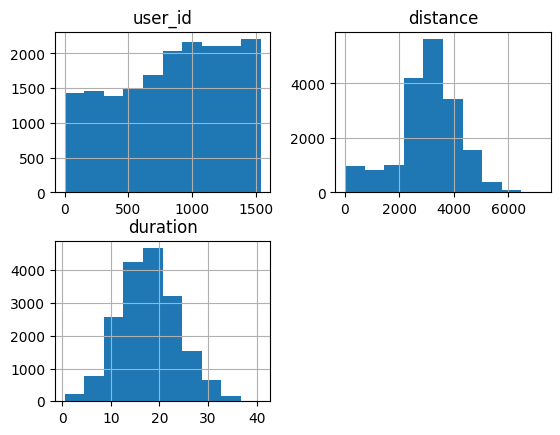

None


In [6]:
#выводим информацию о датафрейме rides
show_data(rides)

В датафрейме с информацией о поездках пользователей 4 колонки:  
`user_id` - уникальный идентификатор пользователя  
`distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)  
`duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
`date` - дата совершения поездки  

Максимальное количество строк в датафрейме - 18 068. В каждом столбце именно такое количество строк - значит в данном датафрейме отсутствую пропуски данных.

Первая колонка `user_id` таблицы содержит *целочисленный тип данных int64*, вторая `distance` и третья `duration` - *вещественные числа (дроби) float64*. Последняя колонка `date` с указанием даты содержит *строковый тип данных object*, что некорректно для даты. В процессе предобработки данных необходимо будет поменять тип данных в колонке на *специальный тип для дат datetime* .

Вес датасета составляет 564.8 Кб.

### Обзор данных о подписках пользователей

In [7]:
#считываем данные из файла subscriptions_go.csv, где хранится информация о подписках пользователей
#сохраняем датафрейм в переменную subscriptions
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None



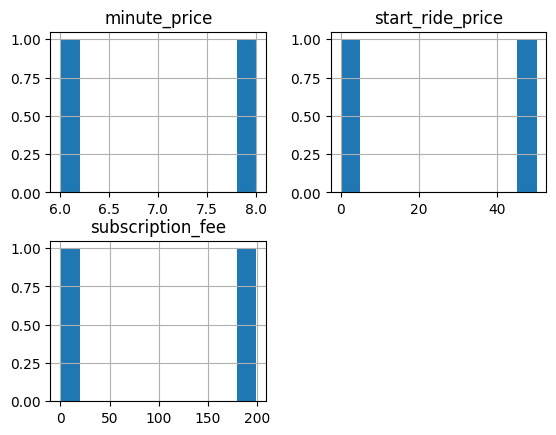

None


In [8]:
#выводим информацию о датафрейме subscriptions
show_data(subscriptions)

В датафрейме с информацией о подписках пользователей 4 колонки:  
`subscription_type` - тип подписки  
`minute_price` - стоимость одной минуты поездки по данной подписке  
`start_ride_price` - стоимость начала поездки  
`subscription_fee` - стоимость ежемесячного платежа  

Строк в таблице всего две, так как существует только 2 типа подписки.

Колонка `subscription_type` содержит *строковый тип данных object*.
Колонки `minute_price`, `start_ride_price`, `subscription_fee` содержат *целочисленный тип данных int64*.

Вес датасета subscriptions - 192 байта.


**ВЫВОДЫ**

Датафреймы содержат достаточное количество информации для проведения исследования и проверки гипотез. В датафреймах содержится как информация о самих пользователях, так и об их поездках. Пропуски в данных отсутствуют, но предже чем проводить исследования с использованием этих данные, необходимо следующим шагом все же провести этап предобраотки - изменить тип данных там, где это необходимо; проверить на явные и неявные дубликаты.

## Предобработка данных

### Изменение типа данных

In [9]:
# меняем тип данных в колонке с датой в датафрейме rides на специальный тип для даты и времени
rides['date'] = pd.to_datetime(rides['date'])

С целью экономии памяти изменим тип данных во всех трех датафреймах с 64-битного на 32-битный:

In [10]:
#меняем тип данных int64 на int32 и float64 на float32 в таблице rides
rides['user_id'] = rides['user_id'].astype('int32')
rides['duration'] = rides['duration'].astype('float32')

In [11]:
#проверим, что в датасете rides изменился формат и сократился вес
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int32         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float32       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(1), int32(1)
memory usage: 423.6 KB


In [12]:
#меняем тип данных int64 на int32 в таблице subscriptions
for type in ['minute_price', 'start_ride_price', 'subscription_fee']:
    subscriptions[type] = subscriptions[type].astype('int32')

In [13]:
#проверим, что в датасете subscriptions сократился вес
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int32 
 2   start_ride_price   2 non-null      int32 
 3   subscription_fee   2 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 168.0+ bytes


In [14]:
#меняем тип данных int64 на int32 в таблице users
for type in ['user_id', 'age']:
    users[type] = users[type].astype('int32') 

In [15]:
#проверим, что в датасете users сократился вес
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int32 
 1   name               1565 non-null   object
 2   age                1565 non-null   int32 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int32(2), object(3)
memory usage: 49.0+ KB


### Создание нового столбца

In [16]:
#добавляем в датафрейм rides колонку с номером месяца
rides['month_number'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599770,2021-01-01,1
1,1,2617.592153,15.816872,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265802,2021-08-28,8


In [17]:
#выведем самую раннюю дату в данных
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [18]:
#выведем самую последнюю дату в данных
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

Данные предоставлены за один год, начиная с 1 января 2021г по 30 декабря 2021г, что означает, что при агрегации по месяцам данные не "склеиваются".

In [19]:
#выводим общие данные о датафрейме
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int32         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float32       
 3   date          18068 non-null  datetime64[ns]
 4   month_number  18068 non-null  int64         
dtypes: datetime64[ns](1), float32(1), float64(1), int32(1), int64(1)
memory usage: 564.8 KB


In [20]:
#меняем тип данных в новом столбце с int64 на int32 и проверяем таблицу с новым стлобцом
rides['month_number'] = rides['month_number'].astype('int32')

In [21]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int32         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float32       
 3   date          18068 non-null  datetime64[ns]
 4   month_number  18068 non-null  int32         
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2)
memory usage: 494.2 KB


### Обработка дубликатов

In [22]:
#проверяем количество явных дубликатов в датафрейме users
users.duplicated().sum()

31

In [23]:
#расчитаем в процентах долю явных дубликатов в данных
users.duplicated().sum() / len(users) * 100 

1.9808306709265175

Доля дубликатов от общего количества данных составляет почти 2%. Это не так много, можем избавиться от явных дубликатов, так как задублированные пользователи с одинаковой информацией, в том числе с одинаковым user_id, очевидно не должны присутствовать в данных. Вероятно, во время регистрации некоторых пользователей произошла какая-то ошибка. Нужно сообщить разработчикам, чтобы проверили, все ли в порядке на сервер и корректно ли уходят запросы по api.

In [24]:
#удаляем из датафрейма строки с явными дубликатами
users = users.drop_duplicates()

In [25]:
#посмотрим общую информацию о датасете
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int32 
 1   name               1534 non-null   object
 2   age                1534 non-null   int32 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int32(2), object(3)
memory usage: 59.9+ KB


In [26]:
#проверяем наличие явных дубликатов в датафрейме rides
rides.duplicated().sum()

0

**ВЫВОДЫ**

После предобработки данных всех трех датафремов был получен следующий результат:    
1. ***Добавлен новый столбец*** `month_number` с порядковыми номерами месяцев в датасеты rides, гда хранится информация о поездках пользователей. Данные даны за период с 01/01/2021 пл 30/12/2021, то есть при агрегации данные не "склеиваются".
2. Датасеты rides и users проверены на наличие ***явных дубликатов***. В датасете ride явных дубликатов не обнаружено. В датасете users найден 31 явный дубликат, что составляет почти 2% от общего количества данных в датасете. Это входит в допустимую доля потери данных, поэтому явные дубликаты были удалены. Вероятно, одни и те же пользователи с одними и теми же поездками задублировались в связи с каким-то сбоем в приложении. О том, что это ошибочные дубли готовит то, что в некоторых строках пользователи с одинаковым user id имеют поездки на одни ите же расстония и с одной и той же продолжительностью, где числа указаны до 6 знаков после запятой, то есть таких совпадений быть не может.  
3. ***Изменены типы данных*** для столбца, где хранятся данные о дате на *datetime*, а также изменен тип данных во всех столбцах с целочисленными и вещественными значениями с 64-битного на 32-битный с целью экономии памяти, в результате чего вес датасета *users* сократился с 61.3 Кб до 59.9 Кб, датасета *rides* сократился с 564.8  Кб до 494.2 Кб и датасета *subscriptions* сократился с 192 байт до 168 байт.

*Рекомендация разработчикам*:   
проверить дубли, например, по дате, так как, возможно, в определенные день произошел сбой в приложении у пользователей при совершении поездок.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:  
- частота встречаемости городов;  
- соотношение пользователей с подпиской и без подписки;  
- возраст пользователей;  
- расстояние, которое пользователь преодолел за одну поездку;  
- продолжительность поездок.

**Частота встречаемости городов**

In [27]:
#посчитаем, какие города и как часто они встречаются в датасете users
print(users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


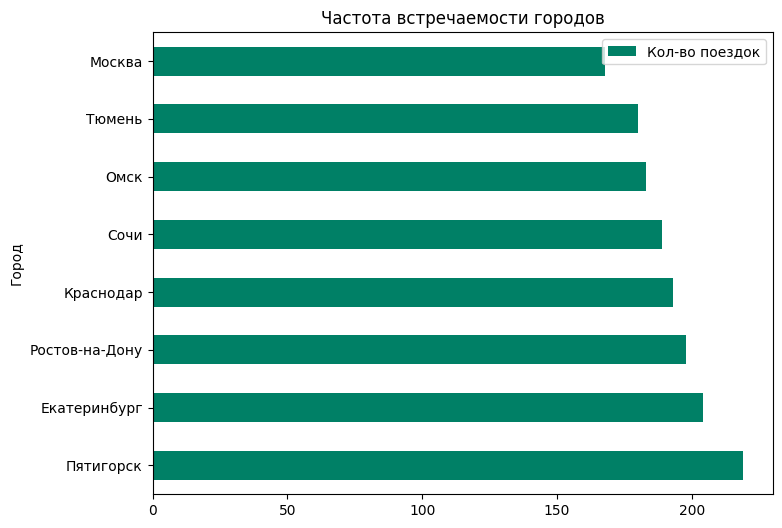

In [28]:
#сделаем сводную таблицу по частоте встречаемости городов в датасете users 
#и построим по столбчатый горизонтальный график 
(
    users.groupby('city')['city'].agg('count')
    .sort_values(ascending=False)
    .plot(kind='barh', cmap='summer', xlabel='Город', figsize=(8, 6), title='Частота встречаемости городов')
)
plt.legend(["Кол-во поездок"], loc='upper right');
plt.show()

Количество пользователей сервисом аренды самокатов практически равномерно распределено во всех представленных в датасете городах и составляет от 11% до 14%.

Чуть больше пользователей арендуют самокаты в *Пятигорске - 14% (219 пользователей)* и меньше всего в *Москве - 11% (168 пользователей)*.  
Можно предположить, что Пятигорск - самый южный из всех представленных в выборке городов и сезон проката там может действовать дольше, чем в остальных городах из-за более благоприятных погодных условий. В Москве, помимо того, что сезон проката длится примерно с мая по октябрь, больше вариантов передвижения:  метро (есть не в каждом городе), каршеринг (также есть не в каждом городе), прокат велосипедов.

**Соотношение пользователей с подпиской и без подписки**

In [29]:
#посчитаем количество пользователей с подписками free и ultra
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

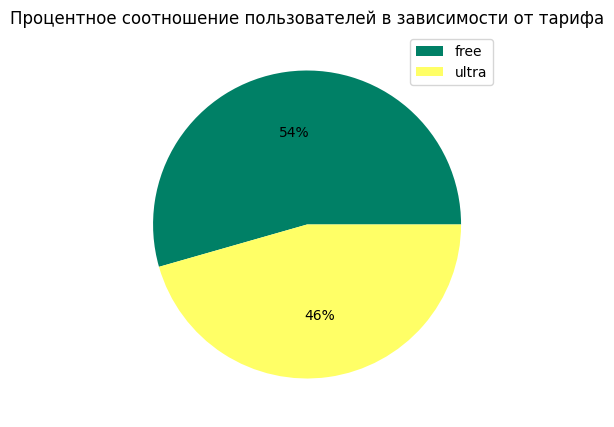

In [30]:
#построим диаграмму в виде пирога, что посмотреть соотношение пользователей по тарифам
users.groupby('subscription_type')['subscription_type'].agg('count').plot(
    kind = 'pie',  
    autopct = '%1.0f%%',
    figsize=(5,5),
    label='',
    labels=None,
    legend=True,
    cmap='summer',
    title='Процентное соотношение пользователей в зависимости от тарифа')

plt.show()

Пользователей с бесплатной подпиской на 8% больше, чем пользователей с подпиской ультра, но, тем не менее, разница в количестве пользователей с подпиской и без подписки не колоссально большая: 845 и 699 соответственно.

**Возраст пользователей**

In [31]:
#создаем сводную таблицу, где посчитаем количество пользователей возрасту 
#и их процентную долю от общего количества пользователей
#отсортируем сводную таблицу от большего показателя к меньшему
print('Количество и доля пользователей в процентах по критерию возраста:')
users_age = users.pivot_table(index='age', values='user_id', aggfunc='count')
users_age.columns = ['count']
users_age['percentage'] = (users_age['count'] / len(users) * 100).round(2)
print(users_age.sort_values(by='count', ascending=False))
print()
#посмотрим на описание столбца с возрастом
print(users['age'].describe())

Количество и доля пользователей в процентах по критерию возраста:
     count  percentage
age                   
25     145        9.45
24     132        8.60
26     131        8.54
23     129        8.41
27     119        7.76
22     119        7.76
28     112        7.30
21      93        6.06
20      71        4.63
30      68        4.43
29      68        4.43
31      48        3.13
19      47        3.06
18      46        3.00
32      41        2.67
33      39        2.54
17      26        1.69
34      19        1.24
16      19        1.24
35      15        0.98
15      13        0.85
14       9        0.59
13       8        0.52
36       6        0.39
12       4        0.26
38       3        0.20
37       2        0.13
39       1        0.07
43       1        0.07

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


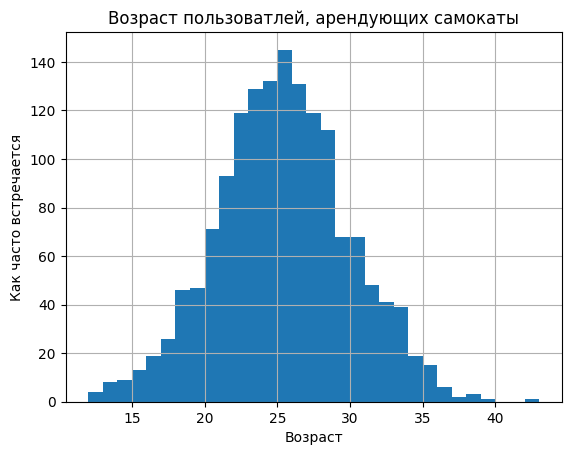

In [32]:
#построим гистограмму по количеству пользователей каждого возраста
plt.hist(users['age'], bins=31, range=(12,43))
plt.title('Возраст пользоватлей, арендующих самокаты')
plt.xlabel('Возраст')
plt.ylabel('Как часто встречается')
plt.grid(True)
plt.show()

Чаще всего прокатом пользуются люди в возрастном диапазоне от 22 до 28 лет.

Медианный возраст пользователей сервиса проката самокатов - 25 лет (он практически совпадает со средним значением). В то же время 25-летних пользователей больше всего в выборке - 9.45% (145 человек).

Минимальный возраст пользователей - 12 лет. Самому старшему пользователю 43 года. Пользователей младше 15 и старше 35 лет в выборке данных единицы.

**Расстояние, которое пользователь преодолел за одну поездку**

In [33]:
#в датасете rides с информацией о поездках пользователей, рассмотрим колонку с расстоянием,
#которое пользовалели проехали
print('10 пользователей с самыми длинными по расстоянию поездками:')
print(rides['distance'].sort_values(ascending=False).head(10))
print()
print('10 пользователей с самыми короткими по расстоянию поездками:')
print(rides['distance'].sort_values(ascending=False).tail(10))
print()
#и посмотрим на описание колонки с расстоянием
print(rides['distance'].describe())

10 пользователей с самыми длинными по расстоянию поездками:
16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
10341    6671.969833
11385    6601.197575
12086    6538.937375
10915    6535.386520
11319    6503.600402
Name: distance, dtype: float64

10 пользователей с самыми короткими по расстоянию поездками:
11862    15.630873
15626    15.366168
13940    15.000606
8324     12.233115
8906     11.283615
7841      7.097072
8658      6.784447
13690     4.329506
9541      2.570787
11555     0.855683
Name: distance, dtype: float64

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


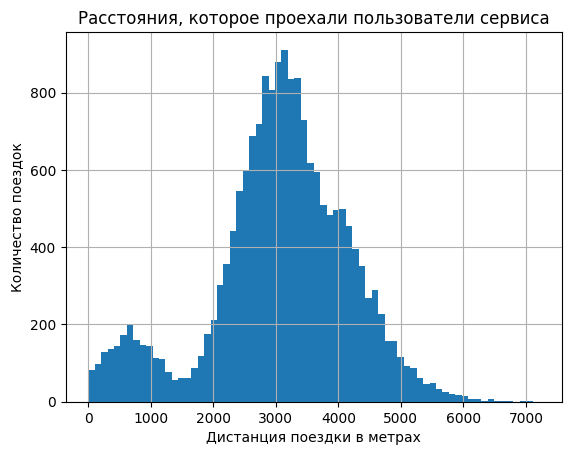

In [34]:
#построим гистограмму на основе данных о расстоянии каждой поездки
plt.hist(rides['distance'], bins=70, range=(0,7211))
plt.title('Расстояния, которое проехали пользователи сервиса')
plt.xlabel('Дистанция поездки в метрах')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

Медианная дистанция, которую проезжают пользователи проката составляет 3134м. На гистограмме наблюдаются два пика: малый - от 0 м до 1400 м и основной большой - от 1500 м до 6000 м.
Если говорить о диапазоне, то чаще всего пользователи проезжают расстояние от 2543м до 3776м.

Самая длительная поезда зафиксирована на дистанцию 7211м, а самая короткая - на 0.86м.

**Продолжительность поездок**


In [35]:
#в датасете rides с информацией о поездках пользователей, рассмотрим колонку duration 
#с продолжительностью поездок пользователей
print('10 пользователей с самыми длительными по длительности поездками:')
print(rides['duration'].sort_values(ascending=False).head(10))
print()
print('10 пользователей с самыми короткими по длительности поездками:')
print(rides['duration'].sort_values(ascending=False).tail(10))
print()
#и посмотрим на описание колонки с расстоянием
print(rides['duration'].describe())

10 пользователей с самыми длительными по длительности поездками:
4215    40.823963
4709    39.873856
2623    39.526604
1998    38.352764
6453    38.265228
143     38.125729
3729    37.014141
499     36.906490
6348    36.809311
4653    36.622593
Name: duration, dtype: float32

10 пользователей с самыми короткими по длительности поездками:
6531     0.5
16540    0.5
10650    0.5
11445    0.5
6570     0.5
6768     0.5
7883     0.5
16179    0.5
9497     0.5
16704    0.5
Name: duration, dtype: float32

count    18068.000000
mean        17.805012
std          6.091051
min          0.500000
25%         13.597563
50%         17.678394
75%         21.724800
max         40.823963
Name: duration, dtype: float64


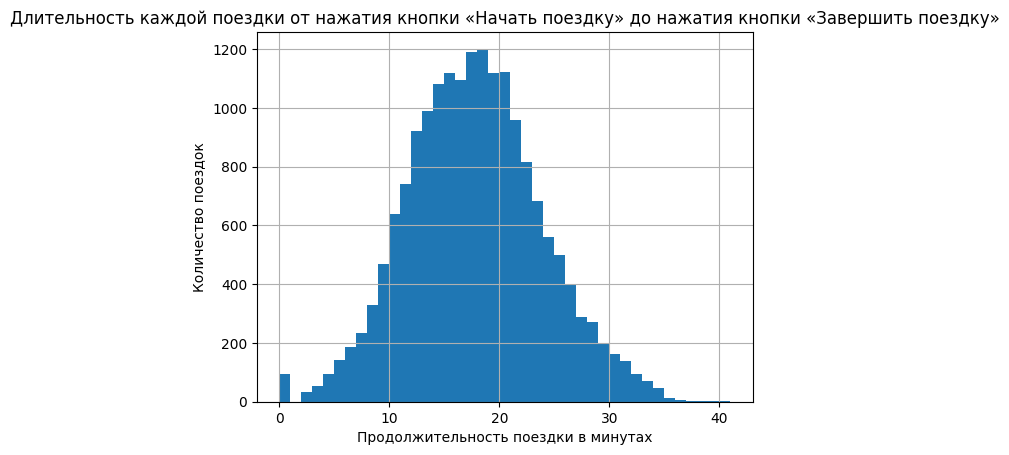

In [36]:
#построим гистограмму на основе данных о длительности каждой поездки
plt.hist(rides['duration'], bins=41, range=(0,41))
plt.title('Длительность каждой поездки от нажатия кнопки «Начать поездку» до нажатия кнопки «Завершить поездку»')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

Отсортировав 10 пользователей с минимальной длительностью поездки и построив график можно увидеть выброс в данных по пользователям с поездками по 0.5 мин. Посмотрим на расстояние, которое проехали этим пользователи.

In [37]:
#отсортирруем данные в датасете rides по убыванию колонки duration
rides.sort_values(by='duration').head(30)

,user_id,distance,duration,date,month_number
12013,1102,4602.122401,0.5,2021-08-01,8
17314,1483,4445.481070,0.5,2021-03-06,3
15029,1318,5894.633314,0.5,2021-03-28,3
7437,766,4539.088310,0.5,2021-12-22,12
12967,1172,4907.140751,0.5,2021-12-19,12
15015,1317,4593.389022,0.5,2021-07-16,7
13012,1176,4935.071045,0.5,2021-05-14,5
7508,772,4718.820996,0.5,2021-05-22,5
16589,1428,5059.187375,0.5,2021-05-06,5
9049,890,4848.485014,0.5,2021-11-20,11


In [38]:
#посчитаем пользователей, проехавших 0.5 минут
rides.query('duration == 0.5').count()

user_id         95
distance        95
duration        95
date            95
month_number    95
dtype: int64

Большинство пользователей пользуются арендой самоката от 13.5 мин до 21.7 мин. Медианна длительность поездок пользователей составляет 17.6 мин и практически совпадает со средней.

Самая длительная поездка в срезе данных - 40.8 мин.

Минимальные по продолжительности поездки - 30 секунд. На гистограмме наблюдается выброс пользователей, которые пользовались арендой 30 секунд, всего 95 подобных поездок.

**ВЫВОДЫ**

**Частота встречаемости городов**  
Количество пользователей сервисом аренды самокатов практически равномерно распределено во всех представленных в датасете городах и составляет от 11% до 14%.

Чуть больше пользователей арендуют самокаты в *Пятигорске - 14% (219 пользователей)* и меньше всего в *Москве - 11% (168 пользователей)*.  
Можно предположить, что Пятигорск - самый южный из всех представленных в выборке городов и сезон проката там может действовать дольше, чем в остальных городах из-за более благоприятных погодных условий. В Москве, помимо того, что сезон проката длится примерно с мая по октябрь, больше вариантов передвижения:  метро (есть не в каждом городе), каршеринг (также есть не в каждом городе), прокат велосипедов.

**Соотношение пользователей с подпиской и без подписки**  
*Пользователей с бесплатной подпиской на 8% больше, чем пользователей с подпиской ультра*, но, тем не менее, разница в количестве пользователей с подпиской и без подписки не колоссально большая: 845 и 699 соответственно. 

**Возраст пользователей**  

Чаще всего прокатом пользуются люди в возрастном *диапазоне от 22 до 28 лет*.   

Медианный возраст пользователей сервиса проката самокатов - *25 лет* (он практически совпадает со средним значением). В то же время 25-летних пользователей больше всего в выборке - 9.45% (145 человек).  

Минимальный возраст пользователей - 12 лет. Самому старшему пользователю 43 года. Пользователей младше 15 и старше 35 лет в выборке данных единицы.

**Расстояние, которое пользователь преодолел за одну поездку**  

*Медианная дистанция*, которую проезжают пользователи проката составляет *3134м*.  
На гистограмме наблюдаются два пика: малый - от 0 м до 1400 м и основной большой - от 1500 м до 6000 м.  
Если говорить о диапазоне, то *чаще всего пользователи проезжают расстояние от 2543м до 3776м*. 

Самая длительная поезда зафиксирована на дистанцию 7211м, а самая короткая - на 0.86м.

**Продолжительность поездок**  

Большинство пользователей пользуются арендой самоката *от 13.5 мин до 21.7 мин*. *Медианна длительность поездок* пользователей составляет *17.6 мин* и практически совпадает со средней.

Самая длительная поездка в срезе данных - 40.8 мин.  

Минимальные по продолжительности поездки - 30 секунд. На гистограмме наблюдается выброс пользователей, которые пользовались арендой 30 секунд, всего 95 подобных поездок.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [39]:
#сначала объединим датасеты users и rides по общей колонке user_id
data_users_rides = users.merge(rides, on='user_id', how='left')
#для финального датасета к новой таблице добавим датасет subscriptions по общей колонке subscription_type
rent_data = data_users_rides.merge(subscriptions, on='subscription_type', how='left')

In [40]:
#посмотрим на получившуюся таблицу
rent_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599770,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816872,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265802,2021-08-28,8,6,0,199


In [41]:
#выведем общую информацию о датафрейме
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int32         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int32         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float32       
 7   date               18068 non-null  datetime64[ns]
 8   month_number       18068 non-null  int32         
 9   minute_price       18068 non-null  int32         
 10  start_ride_price   18068 non-null  int32         
 11  subscription_fee   18068 non-null  int32         
dtypes: datetime64[ns](1), float32(1), float64(1), int32(6), object(3)
memory usage: 1.3+ MB


In [42]:
#проверяем датафрейм на наличие пропусков
rent_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски в датафрейме `rent_data` отсутствуют.

### Создание двух дополнительных датафреймов. 

Из датафрейма `rent_data`, который объединил все три таблицы, создадим два отдельных датафрейма:  
      - c данными о пользователях без подписки;  
      - с данными о пользователях с подпиской.

In [43]:
#создадим таблицу с данными о пользователях без подписки
free_subscription = rent_data.query('subscription_type == "free"')
free_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409800,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [44]:
#создадим таблицу с данными о пользователях c подпиской
ultra_subscription = rent_data.query('subscription_type == "ultra"')
ultra_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599770,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816872,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265802,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671164,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий - ultra и free.

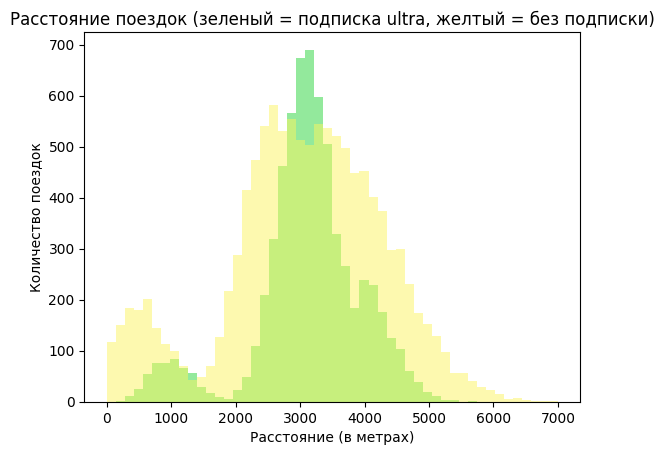

<Figure size 2000x2000 with 0 Axes>

In [45]:
#построим две гистограмму по параметру расстояния для пользователей с подпиской и без 
#наложим две диаграммы друг на друга для более точного сравнения данных
plt.hist(ultra_subscription['distance'], bins=50, range=(0,7000), color='#28D53B', alpha=.5)
plt.hist(free_subscription['distance'], bins=50, range=(0,7000), color='#FCF560', alpha=.5)
plt.title('Расстояние поездок (зеленый = подписка ultra, желтый = без подписки)')
plt.xlabel('Расстояние (в метрах)')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

In [46]:
#посмотрим на описание расстояния для пользователей с подпиской
ultra_subscription['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [47]:
#посмотрим на описание расстояния для пользователей без подписки
free_subscription['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

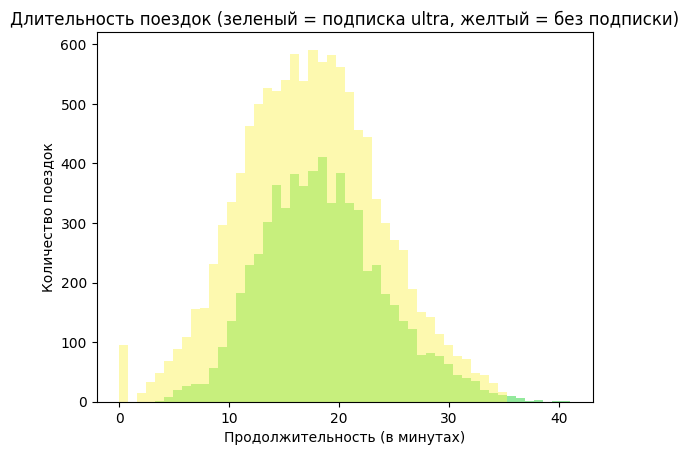

<Figure size 2000x2000 with 0 Axes>

In [48]:
#построим гистограмму по параметру продолжительности поездок для пользователей с подпиской и без
plt.hist(ultra_subscription['duration'], bins=50, range=(0,41), color='#28D53B', alpha=.5)
plt.hist(free_subscription['duration'], bins=50, range=(0,41), color='#FCF560', alpha=.5)
plt.title('Длительность поездок (зеленый = подписка ultra, желтый = без подписки)')
plt.xlabel('Продолжительность (в минутах)')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

In [49]:
#посмотрим на описание длительности для пользователей с подпиской
ultra_subscription['duration'].describe()

count    6500.000000
mean       18.541986
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884128
max        40.823963
Name: duration, dtype: float64

In [50]:
#посмотрим на описание длительности для пользователей без подписки
free_subscription['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958436
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

**ВЫВОДЫ**

Мы объединили все три данных нам изначально датафрейма (`users`, `rides`, `subscriptions`) в один - `rent_data`. После чего этот датафрейм мы разбили на два: `free_subscription` - с данными о пользователях без подписки и `ultra_subscription` - с данными о пользователях с подпиской ultra.  

Следущим шагом мы сравнили на гистограмме два этих датафреймы по параметрам дистанции поездок и длительности.  

Сразу нужно отметить, что **число поездок среди пользователей без подписки почти в 2 раза больше, чем с подпиской**.

***Сравнение расстояния поездок среди пользователей с подпиской и без*** 

*Диапазон расстояний*, которое проезжают пользователи без подписки шире - минимальные поездки фиксируются на 0.85 м и максимальные - на 7211 м, тогда как у пользователей с подпиской минимальное расстояние поездки составляет 244 м, а максимальное - 5699 м.  

По визуализации *наблюдаются два пика* как у тех, кто пользуется подпиской, так и у тех, кто не пользуется. У пользователей с подпиской наблюдается первый небольшой пик в промежутке от 400 м до 1900 м и второй основной в промежутке от 2000 м до 5000 м. У пользователей без подписки присутствует аналогичный малый пик, но в диапазоне от 0 до 1300 м и также второй основной в диапазоне от 1500 м до 6000 м.

Среднее распределение поездок для пользователей без подписки зафиксированно в диапазоне от 2367 м до 3906 м, а у пользователей с подпиской от 2785 м до 3560 м. Здесь мы также наблюдаем, что у пользователей без подписки диапазон расстояний шире.

О том, что разнообразие значений по параметру расстояния у пользователей без подписки больше, чем у пользователей с подпиской, нам также говорят *значения стандартного отклонения: у пользователей без подписки оно больше на 410 м, чем у пользователей с подпиской*.  

*Медианное расстояние* у пользователей без подписки - 3114 м, а с подпиской - 3148 м. Это говорит о том, что не смотря на то, что количество поездок среди пользователей c подпиской почти в 2 раза меньше, но они при этом проезжают в среднем на 34 метра больше.

На гистограмме мы видим, что для пользователей с подпиской ultra основной пик по количеству поездок пришелся на дистанции около 3200м (около 700 поездок), тогда как у пользователей без подписки основной пик меньше и пришелся примерно на 2500м (почти 600 поездок). Обратная ситуация наблюдается на малом пике, где количество поездок у пользователей без подписки значительно больше, чем у тех, кто использует ultra. При этом малый пик у пользователей без подписки пришелся на 600 м (около 200 пользователей проехали эту дистанцию), а у тех, кто использует подписку ultra матый пик пришелся на 1100 м ( проехали около 80 пользователей).
 

Важно обратить внимание на то, что количество *пользователей без подписки, которые берут самокат в аренду и сразу завершают поездку, чуть больше 100*.




***Сравнение длительности поездок среди пользователей с подпиской и без***  

По пикам мы видим, что пользователи с подпиской по времени меньше проезжают, чем пользователей без подписки.  

Минимальное время поездки у пользователей ultra 3.7 мин и максимальное - 40.8 мин. У тех, кто не использует ultra минимальная длительность составляет 0.5 мин и максимальная - 34.9 мин.

*Среднее распределение* по длительности у пользователей с подпиской - от 14.5 мин до 21.8, а у пользователей без подписки - от 12.9 до 21.5, то есть почти одинаковое.  

*Медианное время* поездки для пользователей с подпиской - 18.1 мин и для тех, у кого нет подписки - 17.3. Разница небольшая, пользователи обеих категорий тратят в среднем одинаково по времени на поездки.  

У пользователей без подписки пик количества поездок по времени приходится приблизительно на 17 мин, около 590 поездок. Среди тех, кто пользуется подпиской пик приходится на 18 мин, около 410 поездок.

**Важно отметить, что на гистограмме наблюдается выброс: порядка 100 поездок среди пользователей без подписки продлилиcь менее 1 минуты.** Так как пользователей без подписки в 2 раза больше, поэтому мы видим этот выброс именно на данной категории пользователей. Предположительно, причиной такого выбраса могли стать либо технические неисправности самокатов, либо пользователи по личным причинам отказались от аренды.

## Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. В новом датафрейме посчитаем и добавим колонки с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.

In [51]:
#округлим значения в колонке duration, где указана продолжительность поездок, до целых чисел
rent_data['duration'] = np.ceil(rent_data['duration'])

#создаем сводную таблицу с аггрегированными данными о поездках
data_rides = rent_data.pivot_table(index=['user_id', 
                                        'month_number'], 
                                 values=['subscription_type',
                                         'minute_price',
                                         'start_ride_price',
                                         'subscription_fee',
                                         'distance', 
                                         'duration'],
                                 aggfunc={'subscription_type': 'first',
                                          'month_number': 'count',
                                         'minute_price': 'min',
                                         'start_ride_price': 'min',
                                         'subscription_fee': 'min',
                                          'distance': 'sum', 
                                          'duration': 'sum'})

#переименуем столбцы  и уберем мулииндекс
#data_rides.сolumns = ['distance_sum', 'duration_sum', 'rides_count']
data_rides = data_rides.rename(columns={'distance': 'distance_sum', 
                                        'duration': 'duration_sum',
                                        'month_number': 'rides_count',}).reset_index()

data_rides

,user_id,month_number,distance_sum,duration_sum,minute_price,rides_count,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.511294,42.0,6,2,0,199,ultra
1,1,4,754.159807,7.0,6,1,0,199,ultra
2,1,8,6723.470560,46.0,6,2,0,199,ultra
3,1,10,5809.911100,32.0,6,2,0,199,ultra
4,1,11,7003.499363,56.0,6,3,0,199,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,8,2,50,0,free
11327,1534,8,7622.453034,48.0,8,2,50,0,free
11328,1534,9,4928.173852,23.0,8,1,50,0,free
11329,1534,11,13350.015305,78.0,8,4,50,0,free


In [52]:
#проверим общую информацию о новом датафрейме
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month_number       11331 non-null  int64  
 2   distance_sum       11331 non-null  float64
 3   duration_sum       11331 non-null  float32
 4   minute_price       11331 non-null  int32  
 5   rides_count        11331 non-null  int64  
 6   start_ride_price   11331 non-null  int32  
 7   subscription_fee   11331 non-null  int32  
 8   subscription_type  11331 non-null  object 
dtypes: float32(1), float64(1), int32(3), int64(3), object(1)
memory usage: 619.8+ KB


В новый датафрейм `data_rides` добавим столбец `revenue_sum` с помесячной выручкой, которую принёс каждый пользователь.

In [53]:
#добавляем колонку с выручкой
data_rides['revenue_sum'] = (data_rides['start_ride_price'] * data_rides['rides_count']) + \
(data_rides['minute_price'] * data_rides['duration_sum']) + data_rides['subscription_fee']
data_rides

,user_id,month_number,distance_sum,duration_sum,minute_price,rides_count,start_ride_price,subscription_fee,subscription_type,revenue_sum
0,1,1,7027.511294,42.0,6,2,0,199,ultra,451.0
1,1,4,754.159807,7.0,6,1,0,199,ultra,241.0
2,1,8,6723.470560,46.0,6,2,0,199,ultra,475.0
3,1,10,5809.911100,32.0,6,2,0,199,ultra,391.0
4,1,11,7003.499363,56.0,6,3,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,8,2,50,0,free,308.0
11327,1534,8,7622.453034,48.0,8,2,50,0,free,484.0
11328,1534,9,4928.173852,23.0,8,1,50,0,free,234.0
11329,1534,11,13350.015305,78.0,8,4,50,0,free,824.0


In [54]:
#посмотрим на описание выручки для пользоватей с подпиской ultra
data_ultra = data_rides.query('subscription_type == "ultra"')
data_ultra['revenue_sum'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: revenue_sum, dtype: float64

In [55]:
#посмотрим на описание выручки для пользоватей с подпиской free
data_free = data_rides.query('subscription_type == "free"')
data_free['revenue_sum'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue_sum, dtype: float64

**ВЫВОДЫ**

Поездок среди пользователей с подпиской ultra на 2265 меньше, чем среди пользователей без подписки. Но при этом, медианная выручка с каждой поездки среди пользователей с подпиской выше и составляет 337 руб., тогда как среди пользователей без подписки она составляет 274 руб.  

Средний диапазое по выручке среди подльзователей с подпиской менее широкий, чем у тех, кто не пользуется подпиской. Для пользователей без подписки диапазон по средней выручке составляет от 194 руб. до 428 руб., а для пользователей с подпиской - от 223 руб. до 409 руб.

Если брать максимальную и минимальную выручку, то тут также прослежвается бОльший диапазон для пользователей без подписки - от 58 руб. до 1444 руб., в отличии от пользователей с подпиской - от 88 руб. до 955 руб.

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но перед этим нужно проверить несколько гипотез.  

### Гипотеза №1

**Тратят ли пользователи с подпиской больше времени на поездки?**  

Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**Нулевая гипотеза H0:** Среднее время поезки пользователей с подпиской ultra = среднему времени поездки пользователей без подписки.  
**Альтернативная гипотеза H1:** Среднее время поезки пользователей с подпиской ultra > среднего времени поездки пользователей без подписки.  

In [56]:
#вычисляем дисперсию продолжительности поездок для пользователей с подпиской 
statistics.variance(ultra_subscription['duration'])

31.047722496974373

In [57]:
#вычисляем дисперсию продолжительности поездок для пользователей без подписки
statistics.variance(free_subscription['duration'])

40.02843444863358

Дисперсии значений продолжительности поездок `duration` двух выборок `ultra_subscription` (пользователи с подпиской) и `free_subscription` (пользователи без подписки) отличаются.

In [58]:
#уровень статистической значимости
alpha = .05 

#проведем ttest для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
#в качестве альтернативной гипотезы выбираем правую одностороннюю: «наблюдаемое значение больше предполагаемого»
#так как дисперсия числовых значений duration у двух выборок разная, то укажем это в параметре equal_var
results = st.ttest_ind(
    ultra_subscription['duration'],
    free_subscription['duration'],
    equal_var=False,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 5.674664677435323e-37
Отвергаем нулевую гипотезу.


**ВЫВОД**  

Pvalue оказалось меньше уровня статистической значимости, поэтому нулевая гипотеза отвергается. Пользователи c подпиской ultra тратят больше времени на поездки, чем пользователи без подписки.

### Гипотеза №2

**Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**  

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 

**Нулевая гипотеза H0:** Среднее расстояние, которое проезжаю пользователи с подпиской ultra, = 3130 метров.   
**Альтернативная гипотеза H1:** Среднее расстояние, которое проезжаю пользователи с подпиской ultra, > оптимального - 3130 метров. 

In [59]:
#интересующее нас значение одной поездки для проверки гипотезы
interested_value = 3130

#уровень статистической значимости
alpha = .05 

#проведем ttest для проверки гипотезы, в качестве альтернативной гипотезы выбираем правую одностороннюю:
#«наблюдаемое значение меньше предполагаемого»
results = st.ttest_1samp(
    ultra_subscription['distance'],
    interested_value,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу.


**ВЫВОД**  

Pvalue оказалось больше уровня статистической значимости, поэтому нулевая гипотеза не отвергается. Среднее расстояние, которое проезжают пользователи с подпиской ultra, превышает оптимальное расстояние 3130 метров.

### Гипотеза №3

**Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

**Нулевая гипотеза H0:** Помесячная выручка от пользователей с подпиской по месяцам = выручке от пользователей без подписки.     
**Альтернативная гипотеза H1:** Помесячная выручка от пользователей с подпиской по месяцам > выручки от пользователей без подписки. 

In [60]:
#создадим датафрейм для пользователей с подпиской, где содержится информация о выручке
df_ultra = data_rides.query('subscription_type == "ultra"')
#вычисляем дисперсию значений выручки для пользователей с подпиской 
statistics.variance(df_ultra['revenue_sum'])

7790.31073335113

In [61]:
#создадим датафрейм для пользователей без подписки, где содержится информация о выручке
df_free = data_rides.query('subscription_type == "free"')
#вычисляем дисперсию значений выручки для пользователей без подписки
statistics.variance(df_free['revenue_sum'])

33807.56269650313

Дисперсии значений выручки `revenue_sum` двух выборок `df_ultra` (пользователи с подпиской) и `df_free` (пользователи без подписки) отличаются.

In [62]:
#уровень статистической значимости
alpha = .05 

#проведем ttest для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
#в качестве альтернативной гипотезы выбираем правую одностороннюю: «наблюдаемое значение больше предполагаемого»
#так как дисперсия числовых значений revenue_sum у двух выборок разная, то укажем это в параметре equal_var
results = st.ttest_ind(
    df_ultra['revenue_sum'],
    df_free['revenue_sum'],
    equal_var=False,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу.


**ВЫВОД**  

Pvalue оказалось меньше уровня статистической значимости, поэтому нулевая гипотеза отвергается. Помесячная выручка от пользователей с подпиской ultra по месяцам больше, чем выручка от пользователей без подписки.

### Ответ на вопрос

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**ОТВЕТ**  

Для проверки данной гипотезы необходимо воспользоваться **тестом для проверки гипотезы односторонней гипотезы**. У нас в распоряжении имеется файл, в котором содержится две выборки для каждого пользователя: количество обращений до обновления сервера и после. Требуется проверить, снизилось ли количество обращений в техподдрежку после обновления сервера, поэтому необходимо использовать левосторонний тест.


В этом случае нулевая и альтернативная гипотеза будут сформулированы следующим образом:  
**H0:** количество обращений после обновления сервера осталось прежним.   
**H1:** количество обращений после обновления сервера снизилось.

Для проверки односторонней гипотезы влево в Python применяется метод 
`scipy.stats.ttest_1samp()`, где в качестве аргумента необходимо указать `alternative='less'` для левосторонней гипотезы.

## **Общие выводы**

Для исследования данных сервиса аренды самокатов были даны три датафрейма с информацией о пользователях - `users`, с информацией о поездках - `rides` и с информацией о подписках - `subscriptions`. До проведения исследовательского анализа была проделана следующая работа с данными:

1. Проведена предобработка данных всех трех датафреймов. В результате предобработки данных были изменены типы данных как для того, что привести их к корректому, так и с целью экономии памяти. Также был создан дополнительный столбце с номером месяца. В датафрейме с информацией о пользователях `users` были обнаружены явные дубликты и, так как их доля составила менее 2% от общего числа данных датафрейма, то явные дубликаты были удалены из таблицы.  


2. Был проведен исследовательский анализ данных по нескольким параметрам:

  * **Частота встречаемости городов.** Пользователи из представленных в выборке городов практически равномерно распределены. Чуть больше пользователей в Пятигорске - 14%, меньше всего в Москве - 11%. Предположительно причинами такого распределения по городам может быть то, что в Пятигорске сезон аренды действует дольше из-за благопритных погодных условий, поэтому процент пользователей там больше, а в Москве сезон аренды длится примерно полгода, а также в Москве есть выбор средств передвижения (каршеринг, метро) и количество населения в Москве гораздо больше других городов, что усложняет езду на самокате.  
  
  * **Соотношение пользователей с подпиской и без подписки.** Пользователей без подписки на 8% больше, чем пользователей с подпиской ultra.  
  
  * **Возраст пользователей.** Больше всего самокаты арендует возрастная группа от 22 до 28 лет. Медианный возраст среди пользователей аренды - 25 лет. 
  
  * **Расстояние, которое пользователь преодолел за одну поездку.** В среднем пользователи проезжают 3134 м. При этом наблюдается два пика среди пользователей по проезжаемым дистанциям: малый пик, который фиксирует поездки в диапазоне от 0 до 1400 метров и большой пик, который фиксирует поездки в диапазоне от 1500 до 6000 метров.
  
  * **Продолжительность поездок.** Медианная продолжительность поездок составляет 17.6 минут. В основном большинство ползователей берут самокаты в аренду на период от 13.5 до 21.7 минут. Но в данных также имеется выброс из 95 поездок, которые по длительности составили 30 секунд. Но какой-то причине, пользователи отказали от поездки и завершили аренду. Возможно это связанно с техническими неполадками самокатов или у пользователей поменялись планы. 
  
  *Рекомендация: на выброс из 95 поездок продолжительностью в 30 сек стоит обратить внимание и проверить, так как проблема может быть в техническом состоянии самокатов или сбое в приложении.*  
  
  
3. Три дадафрейма были объединены в один, на основе которого были созданы еще 2 дополнительных: с информацией о пользователях без подписки и о пользователях с подпиской ultra. После чего, были построены две визуализации:

  * **C информацией о расстоянии поездок для пользователей обеих категорий - ultra и free.** Медианное расстояние поездок среди пользователей без подписки составляет 3114 метров и среди пользователей с подпиской - 3148 метров, хотя количество поездок среди тех, у кого имеется подписка почти в 2 раза меньше, чем среди тех, кто не пользуется подпиской. У обеих категорий также наблюдаются два пика: малый пик у пользователей с подпиской наблюдается в промежутке от 400 до 1900 метров и у пользователей без подписки - от 0 до 1300 метров; большой пик среди пользователей с подпиской наблюдается в промежутке от 2000 до 5000 метров и среди пользователей без подписки в диапазоне от 1500 до 6000 метров. Самое большое число поездок среди пользоателей без подписки было совершено на расстоние 3200м - около 700 поездок, а среди пользователей с подпиской на расстояние 2500м - около 600 поездок.
  * **C информацией о времени поездок для пользователей обеих категорий - ultra и free.** Медианное время поездок среди пользователей с подпиской составляет 18.1 мин и среди пользователей без подписки - 17.3 мин. В среднем пользователи с подпиской ultra арендуют самокаты по длительности в диапазоне от 14.5 до 21.8 мин, а пользователи без подписки - от 12.9 до 21.5 мин, то есть средее время аренды у обеих категорий почти одинаковое. Чаще всего пользователи без подписки совершают поездки длительностью в 17 минут, таких поездок больше всего - около 590; пользователи с подпиской больше всего совершили поездок длительность 18 минут - 410 поездок.
  
  *Выброс в 95 поездок продолжительность менее 30 секунд, который мы ранее наблюдали на общей гистограмме, был замечен именно среди пользователей без подписки.*  
  
  
4. Был создан новый датафрейм, на основе общего объединенного и были посчитаны и добавлены в него колонки с суммарным расстоянием - `distance_sum`, количеством поездок - `rides_count`, суммарным временем - `duration_sum` и выручкой - `revenue_sum` для каждого пользователя за каждый месяц.


5. Была создана дополнительная колонка с подсчетом помесячной выручки от каждого пользователя. Поездок среди пользователей с подпиской ultra на 2265 меньше, чем среди пользователей без подписки. Но при этом, медианная выручка с каждой поездки среди пользователей с подпиской выше и составляет 337 руб., тогда как среди пользователей без подписки она составляет 274 руб.  


**Главные выводы и ответы на поставленные вопросы**

В результате исследовательского анализа было проверено три гипотезы с помощью ttest-ов. 

***1. Тратят ли пользователи с подпиской больше времени на поездки?***  

*Нулевая гипотеза H0*: Среднее время поезки пользователей с подпиской ultra = среднему времени поездки пользователей без подписки.  
*Альтернативная гипотеза H1*: Среднее время поезки пользователей с подпиской ultra > среднего времени поездки пользователей без подписки.  

*Ответ*: Нулевая гипотеза отвергается, что означает, что пользователи c подпиской ultra тратят больше времени на поездки, чем пользователи без подписки.  

***2.Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?***  

*Нулевая гипотеза H0*: Среднее расстояние, которое проезжаю пользователи с подпиской ultra, = 3130 метров.  
*Альтернативная гипотеза H1*: Среднее расстояние, которое проезжаю пользователи с подпиской ultra, < 3130 метров.  

*Ответ*: Нулевая гипотеза не отвергается, то есть среднее расстояние, которое проезжают пользователи с подпиской ultra, не превышает 3130 метров.  

***3.Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?***  

*Нулевая гипотеза H0*: Помесячная выручка от пользователей с подпиской по месяцам = выручке от пользователей без подписки.  
*Альтернативная гипотеза H1*: Помесячная выручка от пользователей с подпиской по месяцам > выручки от пользователей без подписки.  

*Ответ*: Нулевая гипотеза отвергается, то есть помесячная выручка от пользователей с подпиской ultra по месяцам больше, чем выручка от пользователей без подписки.

**В результате проделаного анализа очевидно можно сделать вывод, что пользователй с подпиской ultra приносят больше денег и выгодны компании, поэтом продакт-менеджеры должны увеличивать количество пользователей с подпиской (так как их сейчас меньше, чем пользователей без подписки), запуская акции.**